# Feature Selection

[1. Import data (Data Integration)](#1st-bullet)<br>
[2. Explore data (Data Access, Exploration and Understanding)](#2nd-bullet)<br>
[3. Modify data (Data Preparation)](#3rd-bullet)<br>
- [3.1. Feature Selection](#4th-bullet)<br>
    - [3.1.1. Categorical Variables](#5th-bullet)<br>
        - [3.1.1.1. Chi-Square](#6th-bullet)<br>
    - [3.1.2 Numerical Variables](#7th-bullet)<br>
        - [3.1.2.1. Variance](#8th-bullet)<br>
        - [3.1.2.2. Spearman Correlation](#9th-bullet)<br>
        - [3.1.2.3. Feature Importance in Decision Trees](#10th-bullet)<br>
        - [3.1.2.4. Recursive Feature Elimination with Logistic Regression](#11th-bullet)<br>
        - [3.1.2.5. Lasso Regression](#12th-bullet)<br>


<img src="Images/process_ML.png" style="height:70px">

__`Step 1`__ Import all the needed libraries.

In [85]:
# import needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

############################################ FEATURE SELECTION ############################################
#!pip install scipy
import scipy.stats as stats
from scipy.stats import chi2_contingency # filter method
from sklearn.feature_selection import RFE # wrapper method
from sklearn.linear_model import LogisticRegression #(This is one possible model to apply inside RFE)
from sklearn.linear_model import LassoCV # embedded method
from sklearn.tree import DecisionTreeClassifier # embedded method

import warnings
warnings.filterwarnings('ignore')

<a class="anchor" id="1st-bullet">

# 1. Import data (Data Integration)

</a>

<img src="Images/step1.png" style="height:70px">

__`Step 2`__ Import the train dataset and define the index as the `Custid`.

In [86]:
data = pd.read_csv(r'df_clustered.csv')
data.set_index('Customer ID', inplace = True)
data

,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Referred a Friend,Number of Referrals,Tenure in Months,Tenure Category,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,New Customer,Churn Label,Churn Score,CLTV,Churn Reason,Population,Engagement Score,Gender_Male,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Price,Density_High,Density_Low,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Cluster_Demo,Cluster_SVC,Cluster_Streaming,Cluster_Tenure,Cluster_Payment,Cluster_Profit,Cluster_Overall,Cluster_Churn
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,0.967213,0,1,0,0,0.000000,Los Angeles,0,0.000000,0.000000,0.00,0,0.000000,0,1,0.094118,0,0,1,0,0,1,0,0,1,0.212935,0.002406,0.000000,0.133333,0.000000,0.003202,0.50,0,1,0.945055,0.762731,Competitor offered more data,0.652488,0.142857,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,2,3,1,0,2,1,0,1
7495-OOKFY,0.901639,0,1,1,1,0.111111,Los Angeles,1,0.090909,0.098592,0.25,1,0.977195,1,1,0.200000,0,1,0,0,0,0,0,1,1,0.620896,0.070909,0.000000,0.000000,0.109630,0.083855,0.50,0,1,0.703297,0.733600,Competitor made better offer,0.528687,0.571429,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,2,0,1
1658-BYGOY,0.852459,0,1,0,1,0.333333,Los Angeles,0,0.000000,0.239437,0.50,1,0.226645,1,1,0.611765,0,0,0,0,1,1,1,1,1,0.768159,0.200063,0.916047,0.000000,0.057211,0.158013,0.25,0,1,0.835165,0.261508,Competitor made better offer,0.451422,0.428571,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,2,0,2,0,2,0,0,1
4598-XLKNJ,0.967213,0,1,1,1,0.111111,Inglewood,1,0.090909,0.338028,0.50,1,0.395279,0,1,0.141176,0,1,1,0,1,1,0,1,1,0.798507,0.287988,0.269733,0.000000,0.138580,0.248680,0.25,0,1,0.912088,0.741383,Limited range of services,0.263759,0.571429,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,2,0,0,3
4846-WHAFZ,1.000000,0,1,1,1,0.111111,Whittier,1,0.090909,0.507042,0.75,1,0.126625,1,1,0.164706,0,0,0,0,0,0,0,1,1,0.579602,0.328796,0.000000,0.000000,0.065702,0.257652,0.25,0,1,0.681319,0.175673,Extra data charges,0.249387,0.428571,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,0.180328,0,0,0,0,0.000000,Landers,0,0.000000,1.000000,1.00,1,0.455491,0,0,0.000000,0,0,0,0,0,0,0,0,1,0.028856,0.161620,0.387829,0.000000,0.459907,0.252398,1.00,0,0,0.439560,0.734490,NaN,0.020622,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,1,2,2,2,0
6840-RESVB,0.311475,0,0,1,1,0.222222,Adelanto,1,0.090909,0.323944,0.50,1,0.721144,1,1,0.282353,1,0,1,1,1,1,1,1,1,0.662189,0.227521,0.968668,0.000000,0.242712,0.232992,0.50,0,0,0.593407,0.030465,NaN,0.180187,0.857143,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,2,2,2,2,1,0
2234-XADUH,0.180328,0,0,1,1,0.222222,Amboy,1,0.363636,1.000000,1.00,1,0.593319,1,1,0.694118,0,1,1,0,1,1,1,1,1,0.845274,0.847461,0.911428,0.000000,0.599071,0.788735,0.75,0,0,0.725275,0.790972,NaN,0.000294,0.714286,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,2,2,1,3,1,0


<a class="anchor" id="2nd-bullet">

# 2. Explore data (Data access, exploration and understanding)

</a>
<img src="Images/step2.png" style="height:70px">

Remember, this step is very important as it is at this stage that you will really look into the data that you have. Generally speaking, if you do well at this stage, the following stages will be more smooth.

Moreover, you should also take the time to find meaningful patterns on the data: what interesting relationships can be found between the variables and how can that knowledge be inform your future decisions. 

__`Step 3`__ Check if you have missing values in your data with the method `info()`.

In [87]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 8779-QRDMV to 3186-AJIEK
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   float64
 1   Under 30                           7043 non-null   int64  
 2   Senior Citizen                     7043 non-null   int64  
 3   Married                            7043 non-null   int64  
 4   Dependents                         7043 non-null   int64  
 5   Number of Dependents               7043 non-null   float64
 6   City                               7043 non-null   object 
 7   Referred a Friend                  7043 non-null   int64  
 8   Number of Referrals                7043 non-null   float64
 9   Tenure in Months                   7043 non-null   float64
 10  Tenure Category                    7043 non-null   float64
 11  Phone Service                      7043 non-nu

In [88]:
pd.set_option('display.max_columns', None)
data.head(3)

,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Referred a Friend,Number of Referrals,Tenure in Months,Tenure Category,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,New Customer,Churn Label,Churn Score,CLTV,Churn Reason,Population,Engagement Score,Gender_Male,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Price,Density_High,Density_Low,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Cluster_Demo,Cluster_SVC,Cluster_Streaming,Cluster_Tenure,Cluster_Payment,Cluster_Profit,Cluster_Overall,Cluster_Churn
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,0.967213,0,1,0,0,0.000000,Los Angeles,0,0.000000,0.000000,0.00,0,0.000000,0,1,0.094118,0,0,1,0,0,1,0,0,1,0.212935,0.002406,0.000000,0.133333,0.000000,0.003202,0.50,0,1,0.945055,0.762731,Competitor offered more data,0.652488,0.142857,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,2,3,1,0,2,1,0,1
7495-OOKFY,0.901639,0,1,1,1,0.111111,Los Angeles,1,0.090909,0.098592,0.25,1,0.977195,1,1,0.200000,0,1,0,0,0,0,0,1,1,0.620896,0.070909,0.000000,0.000000,0.109630,0.083855,0.50,0,1,0.703297,0.733600,Competitor made better offer,0.528687,0.571429,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,2,0,1
1658-BYGOY,0.852459,0,1,0,1,0.333333,Los Angeles,0,0.000000,0.239437,0.50,1,0.226645,1,1,0.611765,0,0,0,0,1,1,1,1,1,0.768159,0.200063,0.916047,0.000000,0.057211,0.158013,0.25,0,1,0.835165,0.261508,Competitor made better offer,0.451422,0.428571,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,2,0,2,0,2,0,0,1


In [89]:
data.describe(include='O').T

,count,unique,top,freq
City,7043,1106,Los Angeles,293
Churn Reason,1869,20,Competitor had better devices,313


In [90]:
# Check unique values
data['City'].value_counts()

City
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Jacumba               2
South Lake Tahoe      2
Johannesburg          2
Eldridge              2
Holtville             2
Name: count, Length: 1106, dtype: int64

In [91]:
# Check unique values
data['Churn Reason'].value_counts()

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Your data loading code here...
# Assuming your data is stored in a variable named 'data'

plt.figure(figsize=(9, 7))

custcmap = sns.diverging_palette(100, 150, as_cmap=True) 
corr = data[['Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 
              'Number of Dependents', 'Referred a Friend', 'Number of Referrals', 
              'Tenure in Months', 'Tenure Category', 'Phone Service', 
              'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 
              'Avg Monthly GB Download', 'Online Security', 'Online Backup', 
              'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 
              'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing', 
              'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 
              'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 
              'New Customer', 'Churn Label', 'Churn Score', 'CLTV', 
              'Population', 'Engagement Score', 'Gender_Male', 'Offer_Offer A', 
              'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E', 
              'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic', 
              'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card', 
              'Churn Category_Attitude', 'Churn Category_Competitor', 
              'Churn Category_Dissatisfaction', 'Churn Category_Price', 'Density_High', 
              'Density_Low', 'Contract_Month-to-Month', 'Contract_One Year', 
              'Contract_Two Year']].corr(method='spearman')

# Filter correlations greater than 0.75
high_corr_mask = (np.abs(corr) > 0.75) & (corr < 1.0)

# Extract indices of high correlations
high_corr_indices = np.column_stack(np.where(high_corr_mask))

# Create a DataFrame with feature pairs and their correlation values
high_corr_feature_pairs = pd.DataFrame(
    [(corr.index[i], corr.columns[j], corr.iloc[i, j]) for i, j in high_corr_indices],
    columns=['Feature 1', 'Feature 2', 'Correlation']
)

# Display the table using tabulate
table = tabulate(high_corr_feature_pairs, headers='keys', tablefmt='grid', showindex=False)
print("Feature Pairs with Correlation > 0.95:")
print(table)


Feature Pairs with Correlation > 0.95:
+--------------------------------+--------------------------------+---------------+
| Feature 1                      | Feature 2                      |   Correlation |
+================================+================================+===============+
| Married                        | Referred a Friend              |      0.949987 |
+--------------------------------+--------------------------------+---------------+
| Married                        | Number of Referrals            |      0.896375 |
+--------------------------------+--------------------------------+---------------+
| Dependents                     | Number of Dependents           |      0.989819 |
+--------------------------------+--------------------------------+---------------+
| Number of Dependents           | Dependents                     |      0.989819 |
+--------------------------------+--------------------------------+---------------+
| Referred a Friend              | Ma

<Figure size 900x700 with 0 Axes>

In [93]:
data['Cluster_Churn'].value_counts()

Cluster_Churn
0    5174
1     841
3     714
2     314
Name: count, dtype: int64

## Outliers

In [94]:
import pandas as pd
import numpy as np

# Identify numeric columns excluding binary variables
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_binary_cols = [col for col in numeric_cols if len(data[col].unique()) > 2]

# Calculate the interquartile range for each non-binary numeric variable
q1 = data[non_binary_cols].quantile(0.25)
q3 = data[non_binary_cols].quantile(0.75)
iqr = q3 - q1

# Calculate the lower and upper bounds for each non-binary variable
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers for each non-binary variable
outliers = ((data[non_binary_cols] < lower_bound) | (data[non_binary_cols] > upper_bound))

# Count outliers for each non-binary variable
outliers_count = outliers.sum()

# Exclude columns with only 1 or 0 outliers and are binary
outliers_count_filtered = outliers_count[(outliers_count > 1) & (outliers_count < len(data) - 1)]

# Display only non-binary columns with more than 1 and less than (len(data) - 1) outliers
print(outliers_count_filtered)


Number of Dependents           1627
Number of Referrals             676
Avg Monthly GB Download         362
Total Refunds                   525
Total Extra Data Charges        728
Total Long Distance Charges     196
Total Revenue                    21
Satisfaction Score              922
Population                       57
Cluster_Churn                   714
dtype: int64


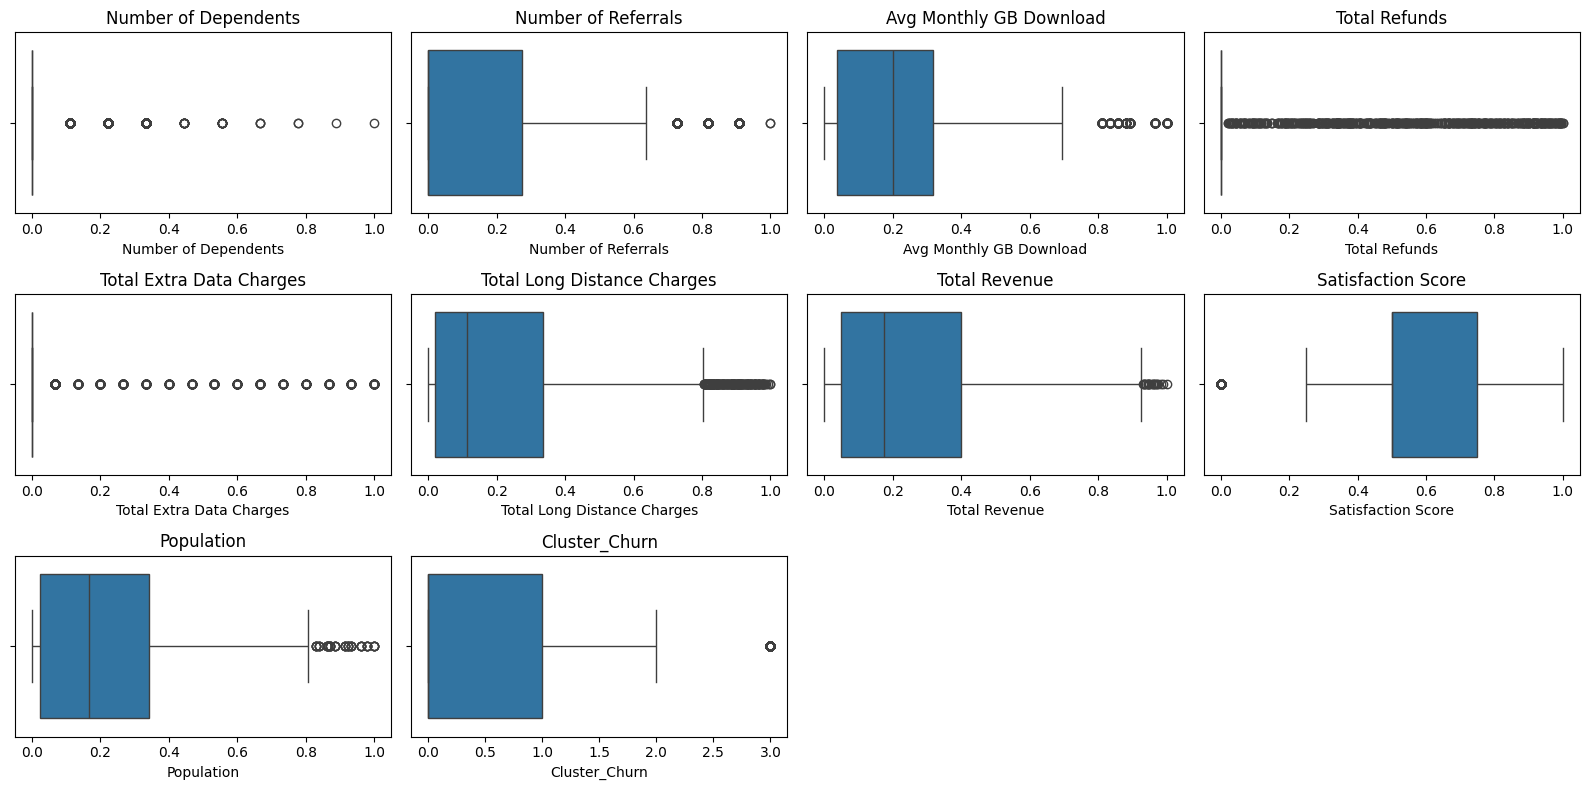

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated outliers_count_filtered as mentioned in your code

# Determine the number of subplots needed
num_plots = len(outliers_count_filtered.index)
num_cols = 4
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots with boxplots in a 4x4 grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Iterate through each variable with outliers
for i, col in enumerate(outliers_count_filtered.index):
    if col in data.columns:
        sns.boxplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'{col}')
    else:
        print(f"Column '{col}' not found in the DataFrame.")

# Remove any empty subplots
for j in range(num_plots, num_cols * num_rows):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


<a class="anchor" id="3rd-bullet">

# 3. Modify data (Data preparation)

</a>
<img src="Images/step3.png" style="height:70px">

Remember that your decisions at this step should be exclusively informed by your **training data**. While you will need to split your data between training and validation, how that split will be made and how to apply the approppriate transformations will depend on the type of model assessment solution you select for your project (each has its own set of advantages and disadvantages that you need to consider). **Please find a list of possible methods for model assessment below**: 

1. **Holdout method**
2. **Repeated Holdout method**
3. **K-Fold Cross-Validation**
4. **One Leave Out**

In this dataset, we are going to use K-Fold Cross-Validation, since it is the one more appropriate for the size of the dataset that we are using.

<img src="Images/KFold.png" style="height:300px">

__`Step 5`__ Import `StratifiedKFold` from `sklearn.model_selection`.

In [96]:
from sklearn.model_selection import StratifiedKFold

__`Step 6`__ Create a new instance of StratifiedKFold named as `skf`, with the following hyperparameters:
- n_splits = 5
- random_state = 99
- shuffle = True

In [97]:
skf = StratifiedKFold(n_splits = 5, random_state = 99, shuffle = True)

__`Step 7`__ To apply any of the model assessment techniques previously mentioned, we need to define at first what are our independent variables (`X`) and the target (`y`).

In [98]:
X = data.drop('Churn Label', axis = 1)
y = data['Churn Label'].copy()

For the remaining steps, we are going to deal with our data as if we had two different data sets: the train and validation data.

<a class="anchor" id="4th-bullet">

## 3.1. Feature Selection
    
</a>

In this step we are going to apply Feature Selection, namely:
- __Variance (Filter Method)__ 
- __Spearman Correlation (Filter Method)__ 
- __Recursive Feature Elimination (RFE) (Wrapper Method)__
- __Lasso Regression (Wrapper Method)__
- __Decision Trees (Embedded Method)__

Since we know that regressions are really sensible to correlated features, we should remove the correlated features before applying those techniques, namely Lasso Regression and Recursive Feature Elimination if the estimator used is a regression model.

In that way, we are going to apply the feature selection techniques in the following order: <br>
__(1) Variance__ - To  understand if there are any constant variables;<br>
__(2) Spearman Correlation__ - To verify if there are any correlated features;<br>
__(3) Decision Trees__ - To just keep one variable from a group of correlated features;<br>
__(4) RFE__ - To iteratively select features by considering subsets of features;<br>
__(5) Lasso__ - To identify and select important features in a dataset;<br>

Furthermore, to apply Feature selection, we need at first to identify the data type of each variable, since different techniques are specific to different data types.


In [99]:
data.head(3)

,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Referred a Friend,Number of Referrals,Tenure in Months,Tenure Category,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Paperless Billing,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,New Customer,Churn Label,Churn Score,CLTV,Churn Reason,Population,Engagement Score,Gender_Male,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Payment Method_Bank Withdrawal,Payment Method_Credit Card,Churn Category_Attitude,Churn Category_Competitor,Churn Category_Dissatisfaction,Churn Category_Price,Density_High,Density_Low,Contract_Month-to-Month,Contract_One Year,Contract_Two Year,Cluster_Demo,Cluster_SVC,Cluster_Streaming,Cluster_Tenure,Cluster_Payment,Cluster_Profit,Cluster_Overall,Cluster_Churn
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,0.967213,0,1,0,0,0.000000,Los Angeles,0,0.000000,0.000000,0.00,0,0.000000,0,1,0.094118,0,0,1,0,0,1,0,0,1,0.212935,0.002406,0.000000,0.133333,0.000000,0.003202,0.50,0,1,0.945055,0.762731,Competitor offered more data,0.652488,0.142857,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,2,3,1,0,2,1,0,1
7495-OOKFY,0.901639,0,1,1,1,0.111111,Los Angeles,1,0.090909,0.098592,0.25,1,0.977195,1,1,0.200000,0,1,0,0,0,0,0,1,1,0.620896,0.070909,0.000000,0.000000,0.109630,0.083855,0.50,0,1,0.703297,0.733600,Competitor made better offer,0.528687,0.571429,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,2,0,1
1658-BYGOY,0.852459,0,1,0,1,0.333333,Los Angeles,0,0.000000,0.239437,0.50,1,0.226645,1,1,0.611765,0,0,0,0,1,1,1,1,1,0.768159,0.200063,0.916047,0.000000,0.057211,0.158013,0.25,0,1,0.835165,0.261508,Competitor made better offer,0.451422,0.428571,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,1,0,0,2,0,2,0,2,0,0,1


In [104]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
# You can load your dataset using pd.read_csv, pd.read_excel, or other appropriate functions

# Create an empty DataFrame to store variable information
variable_info = pd.DataFrame(columns=['Variable', 'Data Type'])

# Iterate through each column in the dataset
for column in data.columns:
    # Determine the data type of the column
    data_type = None

    # Check if the column is categorical
    if data[column].dtype == 'object':
        unique_values = data[column].nunique()
        if unique_values == 2:
            data_type = 'Binary'
        else:
            data_type = 'Categorical'
    # Check if the column is numerical
    elif np.issubdtype(data[column].dtype, np.number):
        if data[column].nunique() == 2:
            data_type = 'Binary'
        else:
            data_type = 'Continuous'

    # Concatenate the information to the variable_info DataFrame
    variable_info = pd.concat([variable_info, pd.DataFrame({'Variable': [column], 'Data Type': [data_type]})], ignore_index=True)

# Replace 'None' with 'Unknown' in the 'Data Type' column
variable_info['Data Type'].replace({None: 'Unknown'}, inplace=True)

# Display the resulting table with variable names
pd.set_option('display.max_rows', None)
print(variable_info)


                             Variable    Data Type
0                                 Age   Continuous
1                            Under 30       Binary
2                      Senior Citizen       Binary
3                             Married       Binary
4                          Dependents       Binary
5                Number of Dependents   Continuous
6                                City  Categorical
7                   Referred a Friend       Binary
8                 Number of Referrals   Continuous
9                    Tenure in Months   Continuous
10                    Tenure Category   Continuous
11                      Phone Service       Binary
12  Avg Monthly Long Distance Charges   Continuous
13                     Multiple Lines       Binary
14                   Internet Service       Binary
15            Avg Monthly GB Download   Continuous
16                    Online Security       Binary
17                      Online Backup       Binary
18             Device Protectio

In [106]:
data.isna().sum() 

Age                                     0
Under 30                                0
Senior Citizen                          0
Married                                 0
Dependents                              0
Number of Dependents                    0
City                                    0
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Tenure Category                         0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                        0
Streaming Music                         0
Unlimited Data                    

<a class="anchor" id="5th-bullet">

### 3.1.1. Categorical features
    
</a>

We are going to use chi-square to understand which categorical variables should we keep. <br>


<a class="anchor" id="6th-bullet">

#### __`3.1.1.1. Chi-Square (Filter Method) - For categorical data`__
    
</a>

__`Step 8`__ - Create a function named as `apply_chisquare` to select features from the categorical variables using `chi2_contigency`from `scipy.stats`.

In [109]:
def apply_chisquare(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

Now it is time to select the categorical features to keep. <br> 
Remember that we want to select features that are important, independently of the subset of data that is being used for train. <br> 
For that, we need to apply our function previously defined inside the StratifiedKFold.

__`Step 9`__ - Create a function named as `select_best_cat_features` that receives the independent variables (X) and the target (y). <br>
Inside of this function, follow these steps:<br>
- Apply the previously defined StratifiedKFold as "skf" for cross-validation.
- Fill missing data, focusing on the categorical features.
- Correct misclassifications in the categorical data that were identified during exploration.
- Call the "apply_chisquare" function on your categorical variables.

In [112]:
def select_best_cat_features(X,y):
    count = 1
    
    ############################################## APPLY SKF ######################################################
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        
        #################################### SELECT FEATURES WITH CHI-SQUARE #######################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using chi-square
        X_train_cat = X_train[['City','Churn Reason']].copy()
        for var in X_train_cat:
            apply_chisquare(X_train_cat[var],y_train, var)
            
        count+=1

__`Step 9B`__ - Call your function `select_best_cat_features` passing as arguments your independent variables and your target.

In [113]:
select_best_cat_features(X,y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
City is IMPORTANT for Prediction
Churn Reason is NOT an important predictor. (Discard Churn Reason from model)
_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________
City is IMPORTANT for Prediction
Churn Reason is NOT an important predictor. (Discard Churn Reason from model)
_________________________________________________________________________________________________

                                     SPLIT 3                                    
__________________________________________

#### What can we conclude?

| Predictor | Chi-Square | What to do? (One possible way to "solve")|
| --- | --- | --- |
| City | 5 Yes 0 No | Keep |
| Churn Reason | 0 YES & 5 NO | Remove|


Keep "City" and Remove "Churn Reason" 

In [114]:
X = X.drop(['Churn Reason'], axis = 1)

## Variance

In [123]:
def select_features_variance(x, y, n_splits=5, random_state=99):
    skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    results = []

    for count, (train_index, val_index) in enumerate(skf.split(x, y), start=1):
        X_train, X_val = x.iloc[train_index], x.iloc[val_index]

        # Exclude non-numeric columns
        numeric_columns = X_train.select_dtypes(include=np.number).columns
        X_train_numeric = X_train[numeric_columns]

        # Calculate variance
        var = X_train_numeric.var()
        results.append(var)

    result_df = pd.concat(results, axis=1)
    result_df.columns = [f'Variance (Split {i})' for i in range(1, n_splits+1)]
    
    return result_df

result_df = select_features_variance(X, y)
result_df


,Variance (Split 1),Variance (Split 2),Variance (Split 3),Variance (Split 4),Variance (Split 5)
Age,0.075345,0.074570,0.075027,0.075905,0.076170
Under 30,0.157691,0.159303,0.160688,0.159281,0.159922
Senior Citizen,0.136295,0.134371,0.133524,0.137588,0.137588
Married,0.249858,0.249717,0.249795,0.249646,0.249745
Dependents,0.179431,0.175607,0.180746,0.175972,0.176550
Number of Dependents,0.011632,0.011019,0.011798,0.011473,0.011296
Referred a Friend,0.248477,0.248168,0.248304,0.248068,0.248146
Number of Referrals,0.073366,0.073537,0.075481,0.074642,0.075176
Tenure in Months,0.119598,0.118874,0.119968,0.119459,0.119516
Tenure Category,0.120436,0.120354,0.121168,0.120713,0.121002


**Spearmann Correlation**

- Since our target is binary, we should not consider the correlation of the independent variables with the target variable to understand if they are "important". 
- In addition, the other binary variables should be excluded: 

In [131]:
def compute_correlation(X, y, skf):
    result = pd.DataFrame(columns=['Combination'] + [f'Split {i+1}' for i in range(skf.n_splits)])

    for i, (train_index, val_index) in enumerate(skf.split(X, y), start=1):
        X_train = X.iloc[train_index].copy()

        # Select numerical features excluding binary variables
        X_train_num = X_train.select_dtypes(include=[np.number])
        binary_vars = ['Under 30', 'Senior Citizen', 'Married', 'Dependents',
                       'Phone Service', 'Referred a Friend', 'Multiple Lines',
                       'Online Security', 'Online Backup', 'Device Protection Plan',
                       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
                       'Unlimited Data', 'Paperless Billing', 'New Customer',
                       'Gender_Male', 'Offer_Offer A', 'Offer_Offer B',
                       'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E',
                       'Internet Type_Cable', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
                       'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card',
                       'Gender_Male',
                       'Churn Category_Attitude', 'Churn Category_Competitor',
                       'Churn Category_Dissatisfaction', 'Churn Category_Price',
                       'Density_High', 'Density_Low',
                       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year']
        X_train_num = X_train_num.drop(binary_vars, axis=1)

        # Compute Spearman correlation for numerical features
        combinations = set()
        correlations = {}
        for col1 in X_train_num.columns:
            for col2 in X_train_num.columns:
                if col1 != col2 and (col2, col1) not in combinations:
                    correlation, _ = spearmanr(X_train_num[col1], X_train_num[col2])
                    if abs(correlation) > 0.7:
                        combinations.add((col1, col2))
                        combinations.add((col2, col1))
                        combination_name = f"{col1} Vs {col2}"
                        correlations[combination_name] = [round(correlation, 1)]

        result.loc[:, f'Split {i}'] = pd.Series(correlations)

    result['Combination'] = result.index
    result = result.reset_index(drop=True)

    return result

# Prepare StratifiedKFold instance
skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

# Compute correlation and generate table
correlation_table = compute_correlation(X, y, skf)
correlation_table

,Combination,Split 1,Split 2,Split 3,Split 4,Split 5
0,Tenure in Months Vs Tenure Category,[1.0],[1.0],[1.0],[1.0],[1.0]
1,Tenure in Months Vs Total Charges,[0.9],[0.9],[0.9],[0.9],[0.9]
2,Tenure in Months Vs Total Revenue,[0.9],[0.9],[0.9],[0.9],[0.9]
3,Tenure Category Vs Total Charges,[0.9],[0.9],[0.9],[0.9],[0.9]
4,Tenure Category Vs Total Revenue,[0.9],[0.9],[0.9],[0.9],[0.9]
5,Avg Monthly Long Distance Charges Vs Cluster_P...,[0.7],[0.7],[0.7],[0.7],[0.7]
6,Internet Service Vs Avg Monthly GB Download,[0.7],[0.7],[0.7],[0.7],[0.7]
7,Internet Service Vs Monthly Charge,[0.7],[0.7],[0.7],[0.7],[0.7]
8,Internet Service Vs Engagement Score,[0.7],[0.7],[0.7],[0.7],[0.7]
9,Internet Service Vs Cluster_Overall,[-0.8],[-0.8],[-0.8],[-0.8],[-0.8]


***
Now it is time to understand the ones that we should keep and the ones to be removed.

Since we know that regressions are really sensible to correlated features, we should remove the correlated features before applying those techniques, namely Lasso Regression and Recursive Feature Elimination if the estimator used is a regression model. Therefore, we will begin by applying decision trees to identify which features among the correlated ones should be excluded.

### Decision Trees and Random Forest (Embedded Methods to use before applying regressions)

Use these two methods to first identify the most important variables and exclude redundant or correlated ones. These methods capture non-linear relationships and handle interactions between variables.


> * __Decision Trees__ - `For continous, ordinal and binary data` It is important to note that regression models are particularly sensible to correlated features. Therefore, we will begin by applying decision trees to identify which features among the correlated ones should be excluded.
> * __Random Forest__ - __Can be used to get the feature importances__, Random Forest improve the variance of simple Decision Trees by incorporating randomness. The criteria to get importance will be __Entropy which is a measure of information that indicates the disorder of the features with the target__. Similar to the Gini Index, the optimum split is chosen by the feature with less entropy. <p>
    
Both methods are not affected by the scale of the features since they make splits based on thresholds and do not rely on the magniture of the values. We tested and results were not different when data was scaled or not.

**Decision Trees**

<a class="anchor" id="10th-bullet">

__`3.1.2.3. Decision Trees (Embedded Method) - For continuous, ordinal and binary data`__

</a>

Similarly to what we have done in the previous techniques, we will now examine the feature importance of the independent variables in the training data  using a decision tree, regardless of the specific train subset being used.

__`Step 17`__ - Create a function named as `plot_importance` that receives the feature importances and the name of the model being applied and: <br>
- Sort the feature importances using sort_values()
- create a figure with figsize=(4,5)  <br>
- plot an horizontal bar with the results <br>
- Add the title ("Feature importance using " and the name of the model)

In [ ]:
def plot_importance(variables,name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

__`Step 18`__ - Create a function named `apply_dt` that takes your training data as input (independent variables and target). In this function:
- Create a DecisionTreeClassifier with random_state = 99 and fit to your training data, Name it as `dt`
- Call the attribute from the model decision trees `feature_importances_` and store those results in a Pandas DataFrame.
- Call the previously defined function `plot_importance` to generate the horizontal bar with the feature importances provided by the decision tree.

In [ ]:
def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

__`Step 19`__ - Create a function named as `select_best_features_dt` that receives the independent variables (X) and the target (y). <br>
Inside of this function, follow these steps:<br>
- Apply the previously defined StratifiedKFold as "skf" for cross-validation.
- Fill missing data, focusing this time on the numerical variables.
- Drop the `Marital_Status`variable, since we are using the feature importance of decision trees to evaluate the numerical data.
- Call the `apply_dt` function on your data.

In [ ]:
def select_best_features_dt(X, y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ####################################### FILL MISSING DATA #################################################
        # Fill missing values in training data
        X_train['Income'].fillna(X_train['Income'].median(), inplace = True)
        
        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')

        # check which features to use using decision Tree
        X_train = X_train.drop(['Marital_Status'], axis = 1)
        apply_dt(X_train, y_train)
        
        count+=1

__`Step 19B`__ - Call your function `select_best_features_dt` passing as arguments your independent variables and your target.

In [ ]:
select_best_features_dt(X, y)

We had identified previously with correlation matrix that two groups of variables that seem to be highly correlated among them, namely:
- Year_Birth, Income, Frq, Mnt
- NetPurchase, CatPurchase, Year_Birth

From the first group, we are going to include only Mnt, the variable that according to decision trees feature importance appears three times as the most important one. We remove `Year_Birth`, `Income` and `Frq`.

From the second group (and not considering Year_birth since this variable have a high correlation with Mnt), we are going to keep NetPurchase, that appears always more important than CatPurchase except in the last split. We remove `CatPurchase`.


__`Step 20`__ - Remove the variables that were excluded by the combination of the results of the decision tree and the correlation matrix, namely `Income`, `Frq`, `CatPurchase` and `Year_Birth`.

In [ ]:
X = X.drop(['Income','Frq','CatPurchase','Year_Birth'], axis = 1)

At this moment, you already removed correlated features and can apply techniques where regression is used.
 <br><br>
 To apply Lasso Regression and RFE (using Logistic Regression as an estimator), we should scale our data previously. <br>
 In the case of the Decision Trees, it is not needed - the results should be similar if data is scaled or not. <br><br>

<a class="anchor" id="11th-bullet">

__`3.1.2.4. Recursive Feature Elimination (RFE) (Wrapper Method) - For continuous, ordinal and binary data`__
    
</a>

__`Step 21`__ - Create a function named `apply_rfe` that takes your training data as input (independent variables and target). In this function:
- Create an instance of RFE named as `rfe`, where `estimator = LogisticRegression()` and `n_features_to_select = 5` 
- Apply the method `fit_transform()` from `rfe` to your training data.
- Call the attribute from the RFE named `support_` and store those results in a Pandas Series named `selected_features`.
- Print `selected_features`


In [ ]:
def apply_rfe(X_train, y_train):
    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
    rfe.fit_transform(X = X_train, y = y_train)
    selected_features = pd.Series(rfe.support_, index = X_train.columns)
    print(selected_features)

<a class="anchor" id="12th-bullet">

__`3.1.2.5. Lasso - For continuous and ordinal data`__
    
</a>

__`Step 22`__ - Create a function named `apply_lasso` that takes your training data as input (independent variables and target). In this function:
- Remove the variable `Dependents` from the training data, since Lasso regression is not appropriate for binary data. 
- Create an instance of LassoCV, and apply the method `fit()`to your training data.
- Call the attribute from the Lasso named `coef_` and store those results in a Pandas Series named `coef`. This will return the coefficients associated with each variable.
- Call the previously defined function `plot_importance` to generate the horizontal bar with the coefficients provided by the Lasso.

In [ ]:
def apply_lasso(X_train, y_train):
    X_train = X_train.drop(['Dependents'], axis = 1)
    lasso = LassoCV().fit(X_train, y_train)
    coef = pd.Series(lasso.coef_, index = X_train.columns)
    plot_importance(coef,'Lasso')

Now it is time to apply the different techniques to our data to each partition, and get insights from it. We can also apply again Decision Trees to obtain our final results.


__`Step 23`__ - Create a function named as `select_best_features` that receives the independent variables (X) and the target (y). <br>
Inside of this function, follow these steps:<br>
- Apply the previously defined StratifiedKFold as "skf" for cross-validation.
- Drop the `Marital_Status`variable, since we are evaluating the numerical data.
- Apply MinMaxScaler to your training data.
- Call the `apply_rfe` function on your data.
- Call the `apply_lasso` function on your data. 
- Call the `apply_dt` function on your data.

In [ ]:
def select_best_features(X,y):
    count = 1
    for train_index, val_index in skf.split(X,y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ####################################### FILL MISSING DATA #################################################
        # Income was already been removed from our variables
        
        ########################################### SCALE DATA #################################################### 
        numerical_data = X_train.drop(['Marital_Status'], axis = 1).copy()
        scaler = MinMaxScaler().fit(numerical_data)
        X_train_scaled = scaler.transform(numerical_data)
        X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)
    
        ######################################### SELECT FEATURES #################################################        
        print('_________________________________________________________________________________________________\n')
        print('                                     SPLIT ' + str(count) + '                                    ')
        print('_________________________________________________________________________________________________')
        
        # Check which features to use using RFE
        print('')
        print('----------------- RFE ----------------------')
        apply_rfe(X_train_scaled, y_train)
        
        # check which features to use using lasso
        print('')
        print('----------------- LASSO ----------------------')
        apply_lasso(X_train_scaled, y_train)
            
        # check which features to use using lasso
        print('')
        print('----------------- DT ----------------------')
        apply_dt(X_train_scaled, y_train)
            
        count+=1

__`Step 23B`__ - Call your function `select_best_features` passing as arguments your independent variables and your target.

In [ ]:
select_best_features(X, y)

At the end, you can combine the results you obtained previously to understand which features are the most important ones. <br>
In Decision Trees and in Lasso, we are going to select the the Top 5.

<hr>



### Numerical Data

`Which variables should we keep using this techniques?`

| Predictor | RFE | Lasso | DT | What to do? (One possible way to "solve") | 
| --- | --- | --- | --- | --- |
Dependents | 2 YES | X | 0 YES |REMOVE |
Rcn | 0 YES | 5 YES | 5 YES | Try with and without |
Mnt | 5 YES | 5 YES | 5 YES | KEEP |
Clothes | 5 YES | 4 YES | 4 YES | KEEP |
Kitchen | 0 YES | 1 YES | 1 YES | REMOVE |
SmallAppliances | 0 YES | 2 YES | 4 YES | Try with and Without |
HouseKeeping | 0 YES | 0 YES | 2 YES | REMOVE |
Toys | 4 YES | 0 YES | 1 YES | Try with and without |
NetPurchase | 4 YES | 5 YES | 3 YES | KEEP |
Recomendation | 5 YES | 2 YES | 0 YES | Try with and Without |
CostPerContact | | | | REMOVE - Constant Feature|
RevenuePerPositiveAnswer | | | | REMOVE - Constant Feature|
Income | | | | REMOVE (Highly correlated with Mnt) |
Frq | |  | | REMOVE (Highly Correlated with Mnt) |
CatPurchase | |  | | REMOVE (Highly Correlated with NetPurchase) |

<hr>


At this stage, we can identify certain variables that appear to be more important to retain, specifically `Mnt`, `Clothes`, `NetPurchase` and `Marital_Status`.

However, there are other variables for which we are less certain about their significance: `Rcn`, `SmallAppliances`, `Toys`, and `Recomendation`.

__`Step 24`__ Let's create two datasets:
- One dataset that includes the variables that we are certain are important (name it as `keep_data`):
    - Variables: Mnt, Clothes, NetPurchase, Marital_Status, DepVar <br><br>
- Another dataset that includes the variables that are both important and those we are unsure about at this point (name it as `all_data`):
    - Variables: Mnt, Clothes, NetPurchase, Rcn, SmallAppliances, Toys, Recomendation, Marital_Status, DepVar

In [ ]:
keep_data = data[['Mnt','Clothes','NetPurchase','Marital_Status','DepVar']].copy()
all_data = data[['Mnt','Clothes','NetPurchase','Rcn','SmallAppliances','Toys','Recomendation','Marital_Status','DepVar']].copy()

<a class="anchor" id="">

# 4 & 5. Model & Assess (Modelling and Assessment)

</a>
<img src="Images/step4.png" style="height:70px">

### 4.1. Model Selection

In this section you should take the time to train different predictive algorithms with the data that got to this stage and **use the approppriate model assessment metrics to decide which model you think is the best to address your problem**.

**You are expected to present on your report the model performances of the different algorithms that you tested and discuss what informed your choice for a specific algorithm**

In [ ]:
# Next Class

### 4.2. Model Optimization

After selecting the best algorithm (set of algorithms), you can try to optimize the performance of your model by fiddling with the algorithms' hyper-parameters and select the options that result on the best overall performance.

Possible ways of doing this can be through:
1. [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
2. [RandomSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)


In [ ]:
# Next Class

<a class="anchor" id="">

# 5. Deploy

</a>
<img src="Images/step5.png" style="height:70px">


### 5.0 Training a final model

You used the previous steps of modelling and assessment to determine what would be best strategies when it comes to preprocessing, scaling, feature selection, algorithm and hyper-parameters you could find. 

**By this stage, all of those choices were already made**. For that reason, a split between training and validation is no longer necessary. **A good practice** would be to take the initial data and train a final model with all of the labeled data that you have available.

**Everything is figured by this stage**, so, on a first level all you need to do is replicate the exact preprocessing, scaling and feature selection decisions you made before.<br>
When it comes to the final model, all you have to do is creeate a new instance of your best algorithm with the best parameters that you uncovered (no need to try all algorithms and hyper-parameters again).

### 5.1. Import and Transform your test data

Remember, the test data does not have the `outcome` variable.

In [ ]:
# Next Class

### 5.2. Obtain Predictions on the test data from your final model

In [ ]:
# Next Class

### 5.3. Create a Dataframe containing the index of each row and its intended prediction and export it to a csv file

In [ ]:
# Next Class